# t-тест (t-критерий Стьюдента)

In [163]:
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms

import seaborn as sns
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(0, 1, 100)

Гипотезы:

$H_0$ – в генеральной совокупности никакого различия между средними значениями нет 

$H_1$ – средние в генеральной совокупности не равны

Применяя Т-критерий Стьюдента нужно помнить о:

1. **Дисперсии** внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий). Проверить можно с помощью критерия Левена и критерия Фишера
2. Особенно важный вопрос - это **требование к нормальности** данных обеих групп при применении t-теста. Во многих учебниках можно встретить довольно жесткое требование к нормальности данных по причине возможного завышения вероятности ошибки I рода.

In [164]:
# сравним дисперсии
print(data1.var())
print(data2.var())

0.8643470479816614
1.017525599336808


In [165]:
stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=0.6082436777784176, pvalue=0.5437229550659171)

p-value больше 0.05, а значит мы не отклоняем нулевую гипотезы и делаем вывод, что различия между средними значениями нет

In [166]:
print(data1.mean())
print(data2.mean())

0.15905101211284592
0.07519096131718223


<AxesSubplot:>

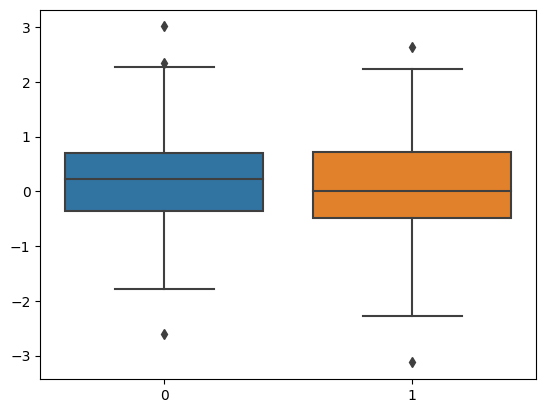

In [167]:
sns.boxplot([data1, data2])

C:\Users\Данила\AppData\Local\Temp\ipykernel_11368\514145980.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1)


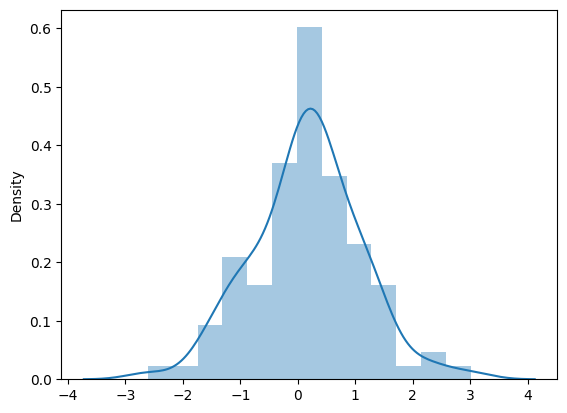

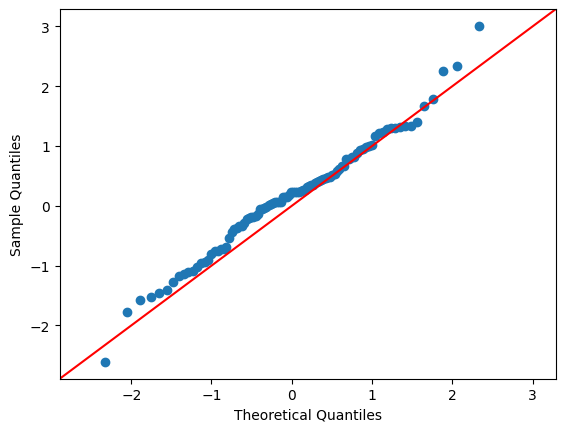

In [168]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sns.distplot(data1)
plt.show()
sm.qqplot(data1, line="45")
plt.show()

C:\Users\Данила\AppData\Local\Temp\ipykernel_11368\248337658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2)


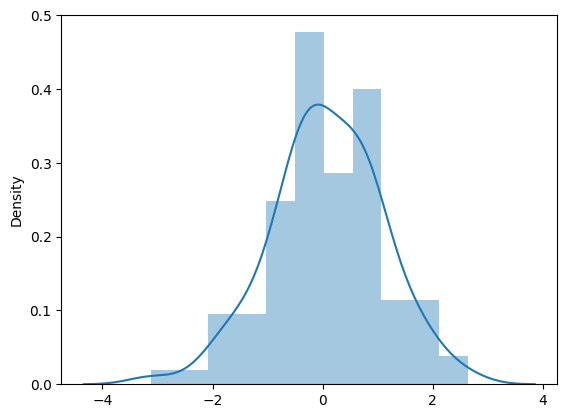

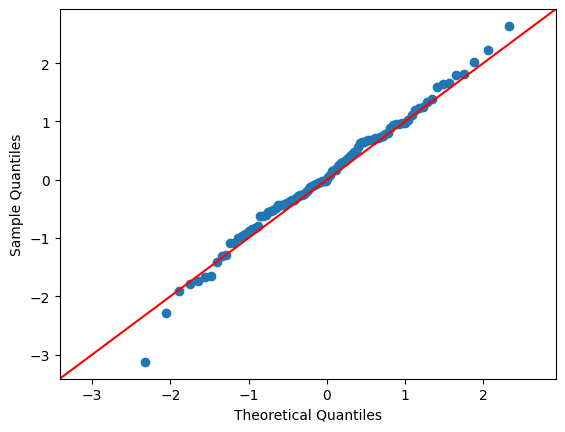

In [169]:
sns.distplot(data2)
plt.show()
sm.qqplot(data2, line="45")
plt.show()

## Тесты для проверки нормальности распределения

* Тест Колмогорова-Смирнова
* Тест Шапиро-Уилка

In [174]:
print(stats.shapiro(data1))
print(stats.shapiro(data2))
# Здесь мы как раз хотим получить р-уровень значимости больше 0.05, 
# поскольку мы тестируем гипотезу о том, что распределения значимо не отличаются от нормального

ShapiroResult(statistic=0.9887177348136902, pvalue=0.5625318288803101)
ShapiroResult(statistic=0.9929565191268921, pvalue=0.8854224681854248)


## U-критерий Манна-Уитни

Если распределение признака отличается от нормального, можно использовать непараметрический аналог – U-критерий Манна-Уитни. Он переводит все данные в ранговую шкалу (ранжирует показатели температуры от 1 до последнего), после этого считает сумму рангов в первой группе и какой во второй. Этот критерий менее чувствителен к экстремальным отклонениям от нормальности и наличию выбросов.

In [176]:
stats.mannwhitneyu(data1, data2)  # ввиду нормального распределения значений p-value практически не отличается от p-value в t-тесте

MannwhitneyuResult(statistic=5240.0, pvalue=0.5584188665370016)